# 2022年度第4ターム「実験数学D」 第06回 01/24(火)4限

In [ ]:
# 必要なモジュールをインストールする
%pip install matplotlib numpy picos scipy

In [2]:
# 必要なモジュールをインポートする
import matplotlib.pyplot as plt
import numpy as np
import picos as pic
import scipy

以下の制約条件付き非線型最適化問題 (最小化) を解く．

## 1. 

- 目的関数: $z = x_{1}^{2} + x_{2}^{2} + x_{3}^{2}$ の最小化
- 制約条件: $2x_{1} + 3x_{2} + x_{3} = 6$
- 最適解: $(x_{1}, x_{2}, x_{3}) = (\frac{6}{7}, \frac{9}{7}, \frac{3}{7})$
- 最適値: $\frac{18}{7}$

In [3]:
# x1^2+x2^2+x3^2を2x1+3x2+x3=6の制約条件のもとで最小化する
# 最適解(x1,x2,x3)=(0.85714285(=6/7), 1.28571429(=9/7), 0.42857143(=3/7))で最適値18/7(=2.5714285714285725)
# 目的関数を定義
def objective_fnc(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    return x1**2 + x2**2 + x3**2


# 等式制約条件
def equality_constraint(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    return 2 * x1 + 3 * x2 + x3 - 6


constraint1 = {"type": "eq", "fun": equality_constraint}
constraint = [constraint1]
# 初期点を設定
x0 = [0, 0, 0]
# 逐次二次計画法を実行
result = scipy.optimize.minimize(
    objective_fnc, x0, method="SLSQP", constraints=constraint
)
# 計算結果を表示
print(result)

# 参考文献: Scipyで多変数関数の最小値を求める（逐次二次計画法の利用）(https://qiita.com/toneriver_py/items/f4f46bef9494d6b40b47)


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 2.5714285714285716
       x: [ 8.571e-01  1.286e+00  4.286e-01]
     nit: 3
     jac: [ 1.714e+00  2.571e+00  8.571e-01]
    nfev: 13
    njev: 3


## 2.

- 目的関数: $z = x_{1}^{2} + \frac{3}{2} x_{2}^{2} - x_{1}x_{2} - 2x_{1} -  4x_{2}$ の最小化
- 制約条件: $2x_{1} + 3x_{2} \leq 6, x_{1} + 4x_{2} \leq 5\ (x_{1}, x_{2} \geq 0)$
- 最適解: $(x_{1}, x_{2}) = (\frac{51}{43}, \frac{41}{43})$
- 最適値: $-4.54 \cdots$

In [4]:
# x1^2+3/2*x2^2-x1x2-2x1-4x2を2x1+3x2<=6,x1+4x2<=5,x1>=0,x2>=0の制約条件のもとで最小化する
# 最適解(x1,x2)=(1.18604651(=51/43), 0.95348837(=41/43))で最適値-4.5465116279069555
# 目的関数を定義
def objective_fnc(x):
    x1 = x[0]
    x2 = x[1]
    return x1**2 + 3 * x2**2 / 2 - x1 * x2 - 2 * x1 - 4 * x2


# 不等式制約条件1: 2x1+3x2-6>=0
def inequality_constraint(x):
    x1 = x[0]
    x2 = x[1]
    return -2 * x1 - 3 * x2 + 6


# 不等式制約条件2: x1+4x2-5>=0
def inequality_constraint2(x):
    x1 = x[0]
    x2 = x[1]
    return -x1 - 4 * x2 + 5


# x1,x2の定義域を0~100にすることで制約条件のx1>=0とx2>=0を満たすようにする
bounds_x1 = (0, 100)
bounds_x2 = (0, 100)
bound = [bounds_x1, bounds_x2]

constraint2 = {
    "type": "ineq",
    "fun": inequality_constraint,
    "fun": inequality_constraint2,
}
constraint = [constraint2]

# 初期点を設定
x0 = [-1, -1]
# 逐次二次計画法を実行
result = scipy.optimize.minimize(
    objective_fnc, x0, method="SLSQP", constraints=constraint
)

# 計算結果を表示
print(result)

# 参考文献:Scipyで多変数関数の最小値を求める（逐次二次計画法の利用）(https://qiita.com/toneriver_py/items/f4f46bef9494d6b40b47)


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -4.546511627907008
       x: [ 1.186e+00  9.535e-01]
     nit: 3
     jac: [-5.814e-01 -2.326e+00]
    nfev: 10
    njev: 3


## 3.

- 目的関数: $z = \Sigma_{i = 0}^{7} w_{i}d_{i}$ の最小化
- 制約条件: $d_{i} \geq \sqrt{(X - x_{i})^{2} + (Y - y_{i})^{2}}$
- 最適解: $(X, Y) \approx (72.41, 12.55)$

最適解: (X, Y) = (64.00000016014629, 66.99999984417863)


/tmp/ipykernel_4528/144679597.py:19: DeprecationWarning: Problem.add_variable is deprecated: Variables can now be created independent of problems, and do not need to be added to any problem explicitly.
  Xs = socp.add_variable("X", 2)
/tmp/ipykernel_4528/144679597.py:21: DeprecationWarning: Problem.add_variable is deprecated: Variables can now be created independent of problems, and do not need to be added to any problem explicitly.
  ds = [socp.add_variable(f"ds[{i}]", 1) for i in hs]


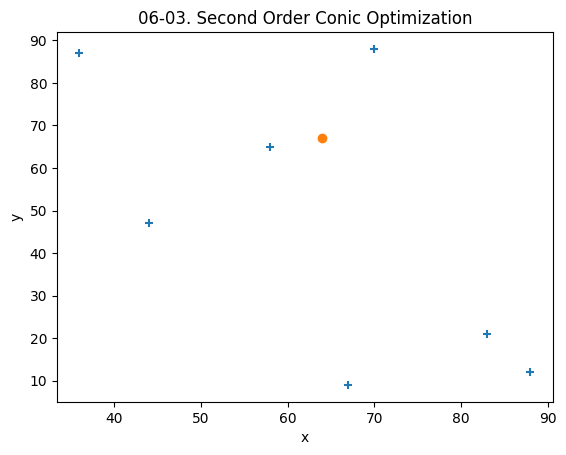

In [32]:
# 3. 次の制約条件付き非線型最適化問題 (最小化) を解く.
# 目的関数: z = Σ_{i = 0}^{7} wi*di
# 制約条件: di >= √((X - xi)^2 + (Y - yi)^2)
# 最適解: (X, Y) ≒ (72.41, 12.55)
# 2次錐最適化問題を設定する
socp = pic.Problem()
# データの組数
n = 7
# 家の番号
hs = np.array(list(range(n)))
# 家のx座標
xs = np.array([44, 64, 67, 83, 36, 70, 88, 58])
# 家のy座標
ys = np.array([47, 67, 9, 21, 87, 88, 12, 65])
# 家の座標
xys = np.array(list(zip(xs, ys)))
# ゴミの量
ws = [1, 2, 2, 1, 2, 5, 4, 1]
# 最適解となる変数
Xs = socp.add_variable("X", 2)
# ゴミ集積所から各家までの距離
ds = [socp.add_variable(f"ds[{i}]", 1) for i in hs]
# 目的関数
objective = sum(w * d for w, d in zip(ws, ds))
# 目的関数および最小化を問題として設定する
socp.set_objective("min", objective)
# 制約条件を追加する
socp.add_list_of_constraints([abs(xy - Xs) <= d for xy, d in zip(xys, ds)])
# 2次錐最適化問題を解く
res = socp.solve(solver="cvxopt")
# 結果を表示する
print(f"最適解: (X, Y) = ({Xs.value[0]}, {Xs.value[1]})")
# 結果を図示する
plt.title("06-03. Second Order Conic Optimization")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(xs, ys, marker="+")
plt.scatter(Xs.value[0], Xs.value[1], marker="o")
plt.show()